# In this notebook:

1. **Lexical Dispersion Plot** - where in the corpus a word appears
2. Plotting **Frequency Over Time**


# 1. Lexical Dispersion Plot - where in the corpus a word appears


#### Questions & Objectives:

- How can I measure how frequently a word appears across the parts of a corpus?
- How can I plot the occurrences of a word and how many words from the beginning of the corpus it appears?
- We will use the US Presidential Inaugural Addresses and which are provided with NLTK.

#### Key Points

- Lexical dispersion is a visualisation that allows us to see where a particular term appears across a document or set of documents
- We used NLTK’s dispersion_plot .

In [1]:
# run this cell now. It's the usual imports of text mining libraries

import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

We can plot lexical dispersion of particular tokens.

**Lexical dispersion is a measure of how frequently a word appears across the parts of a corpus**. 

This plot notes the occurrences of a word and how many words from the beginning of the corpus it appears (word offsets). This is particularly useful for a corpus that covers a longer time period and for which you want to analyse how specific terms were used more or less frequently over time.

To create a lexical disperson plot, you will first load and import a different corpus, the ``inaugural`` corpus which are all US Presidential Inaugural Addresses and which are provided with NLTK: US Presidential Inaugural Addresses (1789-present)

Many libraries you will use (for text mining, visualisation, etc) come with build-in data sets for you to practice. They are nice this way.

In [2]:
#nltk.download('inaugural') #first time running, download package
from nltk.corpus import inaugural
from nltk.text import Text

inaugural_tokens = inaugural.words()
inaugural_texts = Text(inaugural_tokens)

To create the lexical dispersion plot for this corpus you also need to load `dispersion_plot` from the `nltk.draw.dispersion` package.

You can then call the dispersion_plot method given a set of parameters, including the target words you want to plot across the corpus, whether this should be done case-sensitively, and specifying the title of the plot.

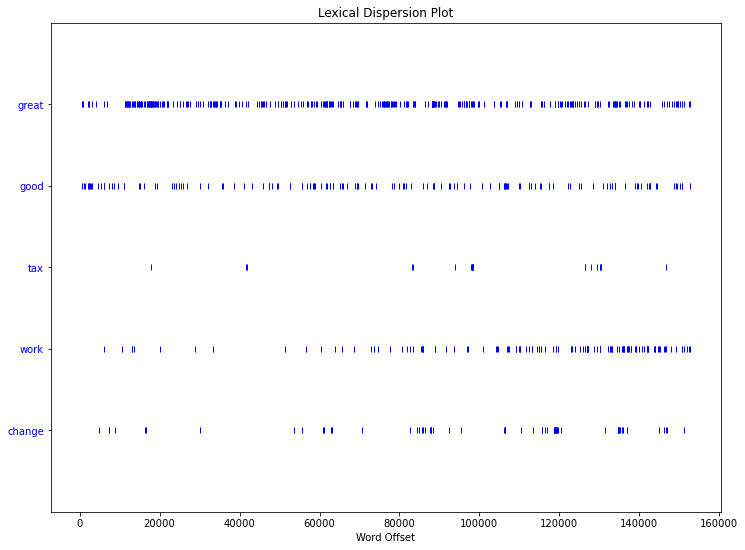

In [3]:
from nltk.draw.dispersion import dispersion_plot

# the following command can be used to increase the size of the plot using width and hight specifications
plt.figure(figsize=(12, 9))
targets=['great','good','tax','work','change']

dispersion_plot(inaugural_texts, targets, ignore_case=True, title='Lexical Dispersion Plot')

### 🖇🐛 thinking minitask: What words might have been used only in some time periods? (max 2 minutes)

- adjust the above code to include other words. Remember these re innaugural speeches of USA presidents 1789-present. What words might have appeared over certain periods and not others. Try words like 'war', 'peace', 'freedom', 'women', 'slavery', 'god'

Do not spend more than 2 minutes on this. Just try some words and move on. Things will get even more interesting in a minute.

Notice that it is really annoying that we cannot see exactly the year when the particular word was heavilly used. We will solve thsat problem in the next section. 

change the contents of ```targets=['great','good','tax','work','change']``` above and re-run it


# 2. Plotting Frequency Over Time


#### Questions & Objectives:

- How can I extract and plot the frequency of specific terms over time?
- How to use a NLTK’s ConditionalFreqDist class to extract the frequency of defined words.

#### Key Points

- We extract terms and the years from the files using NLTK’s ``ConditionalFreqDist`` class from the ``nltk.probability`` package
- How to plot these on a graph to visualise how the use changes over time

Note: codes below involve a Nested loop. You might take few minutes to figure it out.

In [4]:
# Run this cell and then read through it. 
    
# Goal: we have a set of fruit names, and a set of target letters,
# each time a fruit contains a target letter, return them
# eg. because 'pear' contains 'a' and 'p' return [('pear', 'p'), ('pear', 'a')]

fruits = ['pear', "banana", "kiwi", 'apple' ]
targets = ['a', 'p', 'w']

new_words = [(fruit, target)
            for fruit in fruits
            for letter in fruit
            for target in targets
            if letter == target
            ]
print(new_words)

# if this syntax is not clear, ask your classmates or ask on the Discussion Forum, 
# but even if it is not clear, just continue

[('pear', 'p'), ('pear', 'a'), ('banana', 'a'), ('banana', 'a'), ('banana', 'a'), ('kiwi', 'w'), ('apple', 'a'), ('apple', 'p'), ('apple', 'p')]


## How to take meta-information from files to understand corpus better

Similarly to lexical dispersion, you can also plot frequency of terms over time. This is similarly to the Google n-gram visualisation for the Google Books corpus but we will show you how to do something similar for your own corpus.

You first need to import NLTK’s ConditionalFreqDist class from the nltk.probability package. To generate the graph, you have to specify the list of words to be plotted (see targets) and the x-axis labels (in this case the year the inaugural was held which appears at the start of each file: fileid[:4]).

Note: file names are in format `1789-Washington.txt`, `1801-Jefferson.txt` so first 4 characters describe the year the speech was given

The required data for the plot needs to be in format, where word is repeated for each year as many times as it was used that year, eg `freedom` was used 4 times in 1801 and twice in 1805:

```
[('freedom', '1801'),
 ('freedom', '1801'),
 ('freedom', '1801'),
 ('freedom', '1801'),
 ('freedom', '1805'),
 ('freedom', '1805'),
 ('freedom', '1809'),
...
```

This dataset is created by:

- return a tupple with a word and the year of the speech `(target, fileid[:4])`
- for each **filename** (fileid) from the speeches set: `for fileid in inaugural.fileids()`
- then for each **word** in that file `for word in inaugural.words(fileid)`
- then for each **target** word in our specified target words
- use that word **only if** word starts with the target `if word.lower().startswith(target))`
    
```
[(target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in targets
    if word.lower().startswith(target)]
```
    

The ``ConditionalFreqDist`` object (cfd) stores the number of times each of the target words appear in the each of the speaches and the plot() method is used to visualise the graph.

Also see the following websites for more examples:

- https://www.nltk.org/api/nltk.html?highlight=conditionalfreqdist#nltk.probability.ConditionalFreqDist
- https://lost-contact.mit.edu/afs/cs.pitt.edu/projects/nltk/docs/tutorial/probability/conditionalfreqdist.html

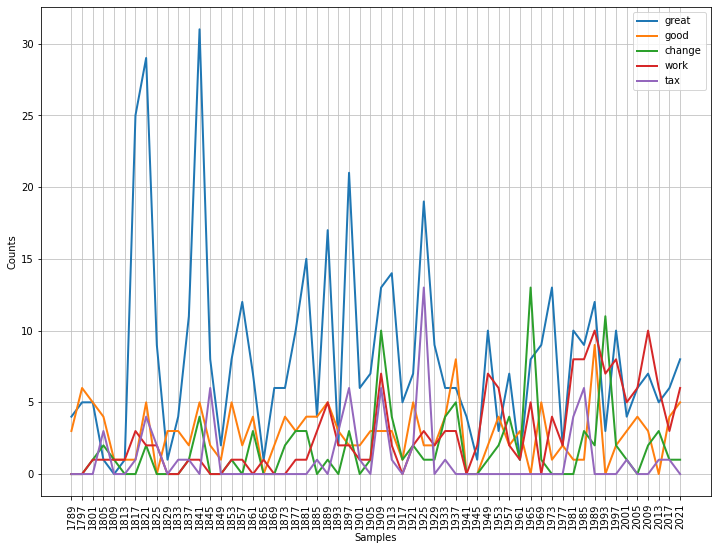

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
from nltk.probability import ConditionalFreqDist

# type this to set the figure size
plt.rcParams["figure.figsize"] = (12, 9)

targets=['great','good','tax','work','change']

cfd = nltk.ConditionalFreqDist(
    [(target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in targets
    if word.lower().startswith(target)])

cfd.plot()

### 🐛Minitask: 

- change the words in the above graph.

- try to use regular expressions instead of specific words (see hints below)

eg. if you wanted to compare together occurances of

- words `man & men`
- word `freedom`
- any other words that start with `free` you could use targets:

`targets=['^m[ea]n$', '^freedom$', '^free']`

and instead of 

`if word.lower().startswith(target)])`

use

`if re.search(target, word.lower()))`

In [ ]:
# copypaste the graph code to this cell and write your answer here
import re








<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    plt.rcParams["figure.figsize"] = (12, 9)
    targets=['^m[ea]n$', '^freedom$', '^free']
    cfd = nltk.ConditionalFreqDist((target, fileid[:4])
        for fileid in inaugural.fileids()
        for word in inaugural.words(fileid)
        for target in targets
        if re.search(target, word.lower()))
    cfd.plot()
         
### END SOLUTION

</details>









source: ls_Text and Data Mining Bootcamp